# Assignment - 04 : Hyperparameter Tuning

* Apply algorithms such as kNN,SVM, Gradient Boosting, Ada
boosting and XG Boost
* Also perform hyperparameter tuning

[Dataset](https://drive.google.com/file/d/1P44V5pI5iZwX6PIPl24l6GXw0bKvvf1B/view?usp=sharing)

1. Importing necessary libraries and loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/credit_card_default.csv')


In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
cols = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

2. Checking for missing values of attributes

In [ ]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

3. Analyzing numerical data

In [ ]:
out_data = data[cols]
out_data.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


4. Checking for outliers

<Axes: >

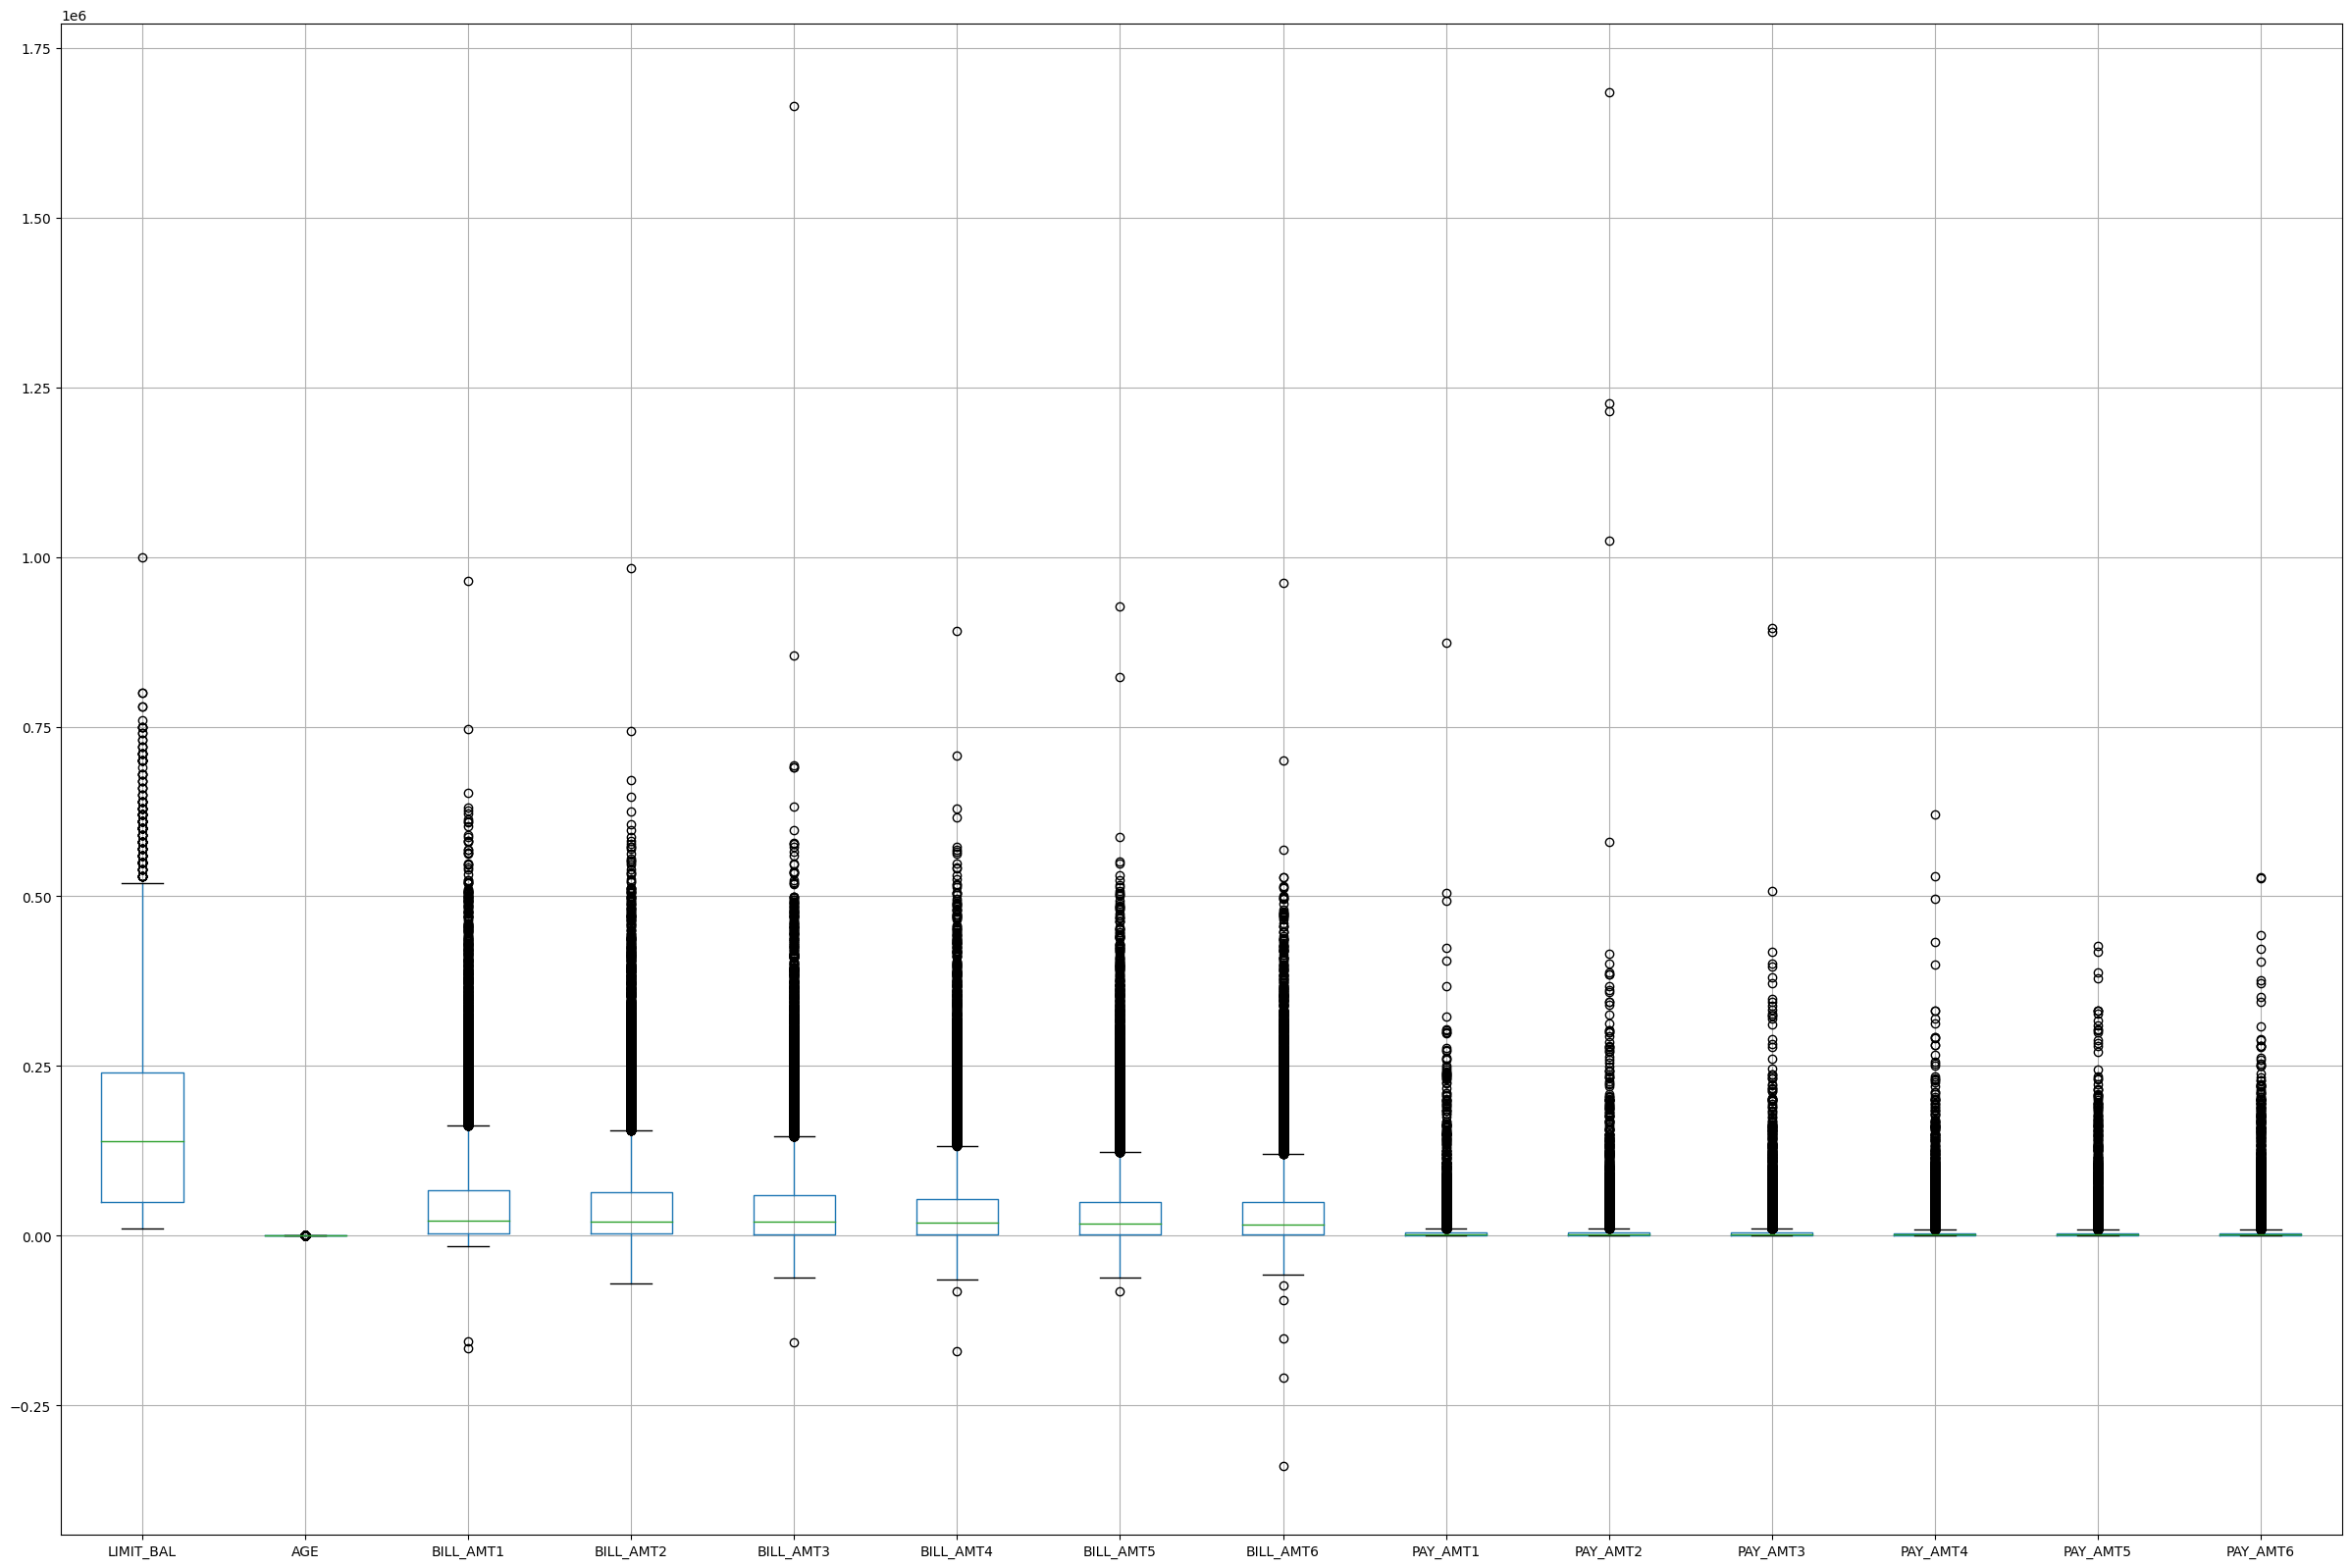

In [ ]:
plt.figure(figsize=(30,20))
out_data.boxplot()

Instead of treating the outliers, in the steps that follow cross-validation is used to overcome their effect on the prediction.
* Cross-validation is a technique that helps to evaluate the performance of a
machine learning model by dividing the data into multiple subsets and training the model on different combinations of these subsets. This helps to reduce the impact of outliers on the model's performance by ensuring that the model is not overfitting the data.


5. Analyzing target attribute

In [ ]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

It can be noticed from the step above that the target column suffers from data imbalance.

6. Separating target feature and independent features

In [ ]:
x = data.drop(['ID','default payment next month'],axis=1)
y = data['default payment next month']

7. Scaling the independent features

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)


In [ ]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-1.136720,0.810161,0.185828,-1.068199,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.861119,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.861119,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.068199,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.068199,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


8. Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# kNN

* KNeighborsClassifier(n_neighbors=[value], p=[value], metric=[value])

* parameter grid : This parameter is a dictionary or a list of dictionaries containing hyperparameters to tune.

* param_grid = {
              
              'n_neighbors': [3, 5, 7],  # Number of neighbors
              'weights': ['uniform', 'distance'],  # Weight function used in prediction
              'p': [1, 2]}  # Power parameter for the Minkowski metric

* grid_search is an object that performs exhaustive search over specified parameter values for an estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# parameter grid
param_grid = {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


grid_search.fit(x_train, y_train)

# best parameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ",grid_search.best_score_)

# Evaluating the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test set accuracy: ",test_score)

Best parameters:  {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best cross-validation score:  0.7988444444444445
Test set accuracy:  0.7992


# SVM

* In SVM the kernel determines the type of decision boundary used to separate classes in the feature space. Different kernels have different shapes of decision boundaries and thus affect how the SVM model behaves.

* param_dist = {'kernel': ['linear', 'rbf', 'poly']}
Each value in the list represents a different type of kernel -  linear, radial basis function (RBF), and polynomial.
It is similar to param_grid in GridSearchCV.

* n_iter = 3 , instead of trying all possible combinations of parameters, it randomly selects a subset to try. n_iter=3 means it will try 3 random combinations of parameters.

* n_jobs=-1: This parameter specifies the number of parallel jobs to run. Setting it to -1 means that the computation will be distributed across all available CPU cores, making the process faster.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Defining the SVM model
svm = SVC()

# Defining the parameters
param_dist = {'kernel': ['linear', 'rbf', 'poly']}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(svm, param_dist, n_iter=3, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the data
random_search.fit(x_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best parameters: ", random_search.best_params_)
print("Best cross-validation score: ",random_search.best_score_)

# Evaluate the model on the test set
test_score = random_search.score(x_test, y_test)
print("Test set accuracy: ",test_score)


Best parameters:  {'kernel': 'rbf'}
Best cross-validation score:  0.8195111111111112
Test set accuracy:  0.8181333333333334


# Gradient Boosting

* Gradient Boosting builds a strong predictive model by combining multiple weak models, typically decision trees, in a sequential manner

* Regularization: To prevent overfitting, Gradient Boosting uses regularization techniques such as controlling the number of weak learners (trees), learning rate, and tree depth.

*  'n_estimators': number of boosting stages (trees) to be used in the ensemble. Increasing the number of estimators generally improves the performance of the model but also increases the computational cost.

* 'learning_rate': Also known as the shrinkage parameter, it scales the contribution of each tree. A lower learning rate makes the model more robust to overfitting but requires more estimators to achieve the same performance.

* 'max_depth': This parameter determines the maximum depth of the individual regression estimators (trees) in the ensemble. Increasing max_depth allows the model to capture more complex patterns in the data but also increases the risk of overfitting.

* 'subsample': It controls the fraction of samples to be used for fitting the individual base learners (trees). A value less than 1.0 leads to stochastic gradient boosting, where each tree is fit on a random subset of the training data. This can help prevent overfitting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Defining the Gradient Boosting model
gb = GradientBoostingClassifier()

# Defining the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(gb, param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search_gb.fit(x_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best parameters: ", random_search_gb.best_params_)
print("Best cross-validation score: ",random_search_gb.best_score_)

# Evaluate the model on the test set
y_pred_gb = random_search_gb.predict(x_test)
test_score_gb = accuracy_score(y_test, y_pred_gb)
print("Test set accuracy: ",test_score_gb)


Best parameters:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best cross-validation score:  0.8207555555555557
Test set accuracy:  0.8210666666666666


# Ada Boost

Like Gradient Boosting, AdaBoost also builds an ensemble of weak learners (typically decision trees) sequentially. However, in AdaBoost, each weak learner is trained on a modified version of the dataset. The modification involves adjusting the weights of incorrectly classified instances, focusing more on those instances that were misclassified by previous learners.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


adaboost = AdaBoostClassifier()


param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

random_search_adaboost = RandomizedSearchCV(adaboost, param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)


random_search_adaboost.fit(x_train, y_train)


print("Best parameters: ", random_search_adaboost.best_params_)
print("Best cross-validation score: ",random_search_adaboost.best_score_)


y_pred_adaboost = random_search_adaboost.predict(x_test)
test_score_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Test set accuracy: ",test_score_adaboost)


Best parameters:  {'n_estimators': 100, 'learning_rate': 0.01}
Best cross-validation score:  0.8196
Test set accuracy:  0.8196


# XG Boost

* Extreme Gradient Boosting - XGBoost enhances upon capabilities of GradientBoost and AdaBoost by incorporating advanced regularization techniques, tree pruning algorithms, and support for parallelization and distributed computing. These features make XGBoost particularly well-suited for handling large-scale, high-dimensional datasets and achieving state-of-the-art performance in various machine learning tasks.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


xgb = XGBClassifier()


param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}


random_search_xgb = RandomizedSearchCV(xgb, param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)


random_search_xgb.fit(x_train, y_train)


print("Best parameters: ", random_search_xgb.best_params_)
print("Best cross-validation score: ",random_search_xgb.best_score_)

# Create and fit the final XGBoost model with the best parameters found during hyperparameter tuning
best_xgb = XGBClassifier(n_estimators=random_search_xgb.best_params_['n_estimators'],
                         learning_rate=random_search_xgb.best_params_['learning_rate'],
                         max_depth=random_search_xgb.best_params_['max_depth'],
                         subsample=random_search_xgb.best_params_['subsample'])

best_xgb.fit(x_train, y_train)


y_pred_xgb_final = best_xgb.predict(x_test)


test_score_xgb_final = accuracy_score(y_test, y_pred_xgb_final)
print("Test set accuracy using best XGBoost model: ",test_score_xgb_final)


Best parameters:  {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best cross-validation score:  0.8212444444444446
Test set accuracy using best XGBoost model:  0.8201333333333334
